<a href="https://colab.research.google.com/github/Mehak-Thakur/Mileage-Prediction--Regression-Analysis/blob/main/Mileage_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Mileage Prediction - Regression Analysis

Objective: To predict the mileage (miles per gallon, MPG) of cars based on their technical and categorical features.

Dataset: Mileage prediction involves estimating the fuel efficiency of vehicles, measured in miles per gallon (MPG), using regression models. This task leverages vehicle-specific features such as engine displacement, horsepower, weight, acceleration, model year, and origin to understand the relationship between these attributes and fuel efficiency.

Use Cases:
Optimizing vehicle design for improved fuel efficiency.
Supporting consumers in making informed purchasing decisions.
Aiding manufacturers in complying with fuel economy regulations.
Approach: Regression analysis, particularly linear and non-linear models, is applied to identify patterns in the data. Advanced techniques like Random Forest or Gradient Boosting may also be used for better accuracy.

Importing Necessary Libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [2]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64



Data Visualization

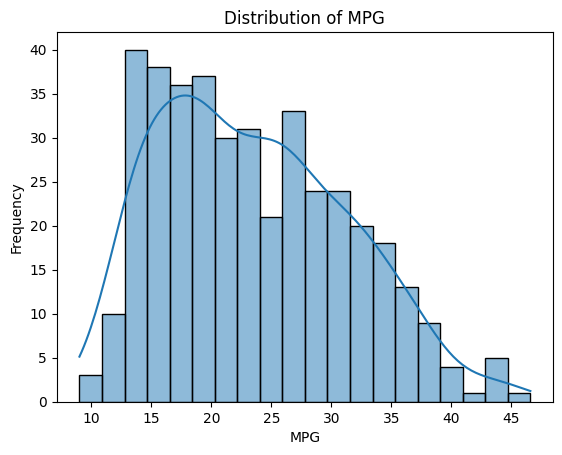

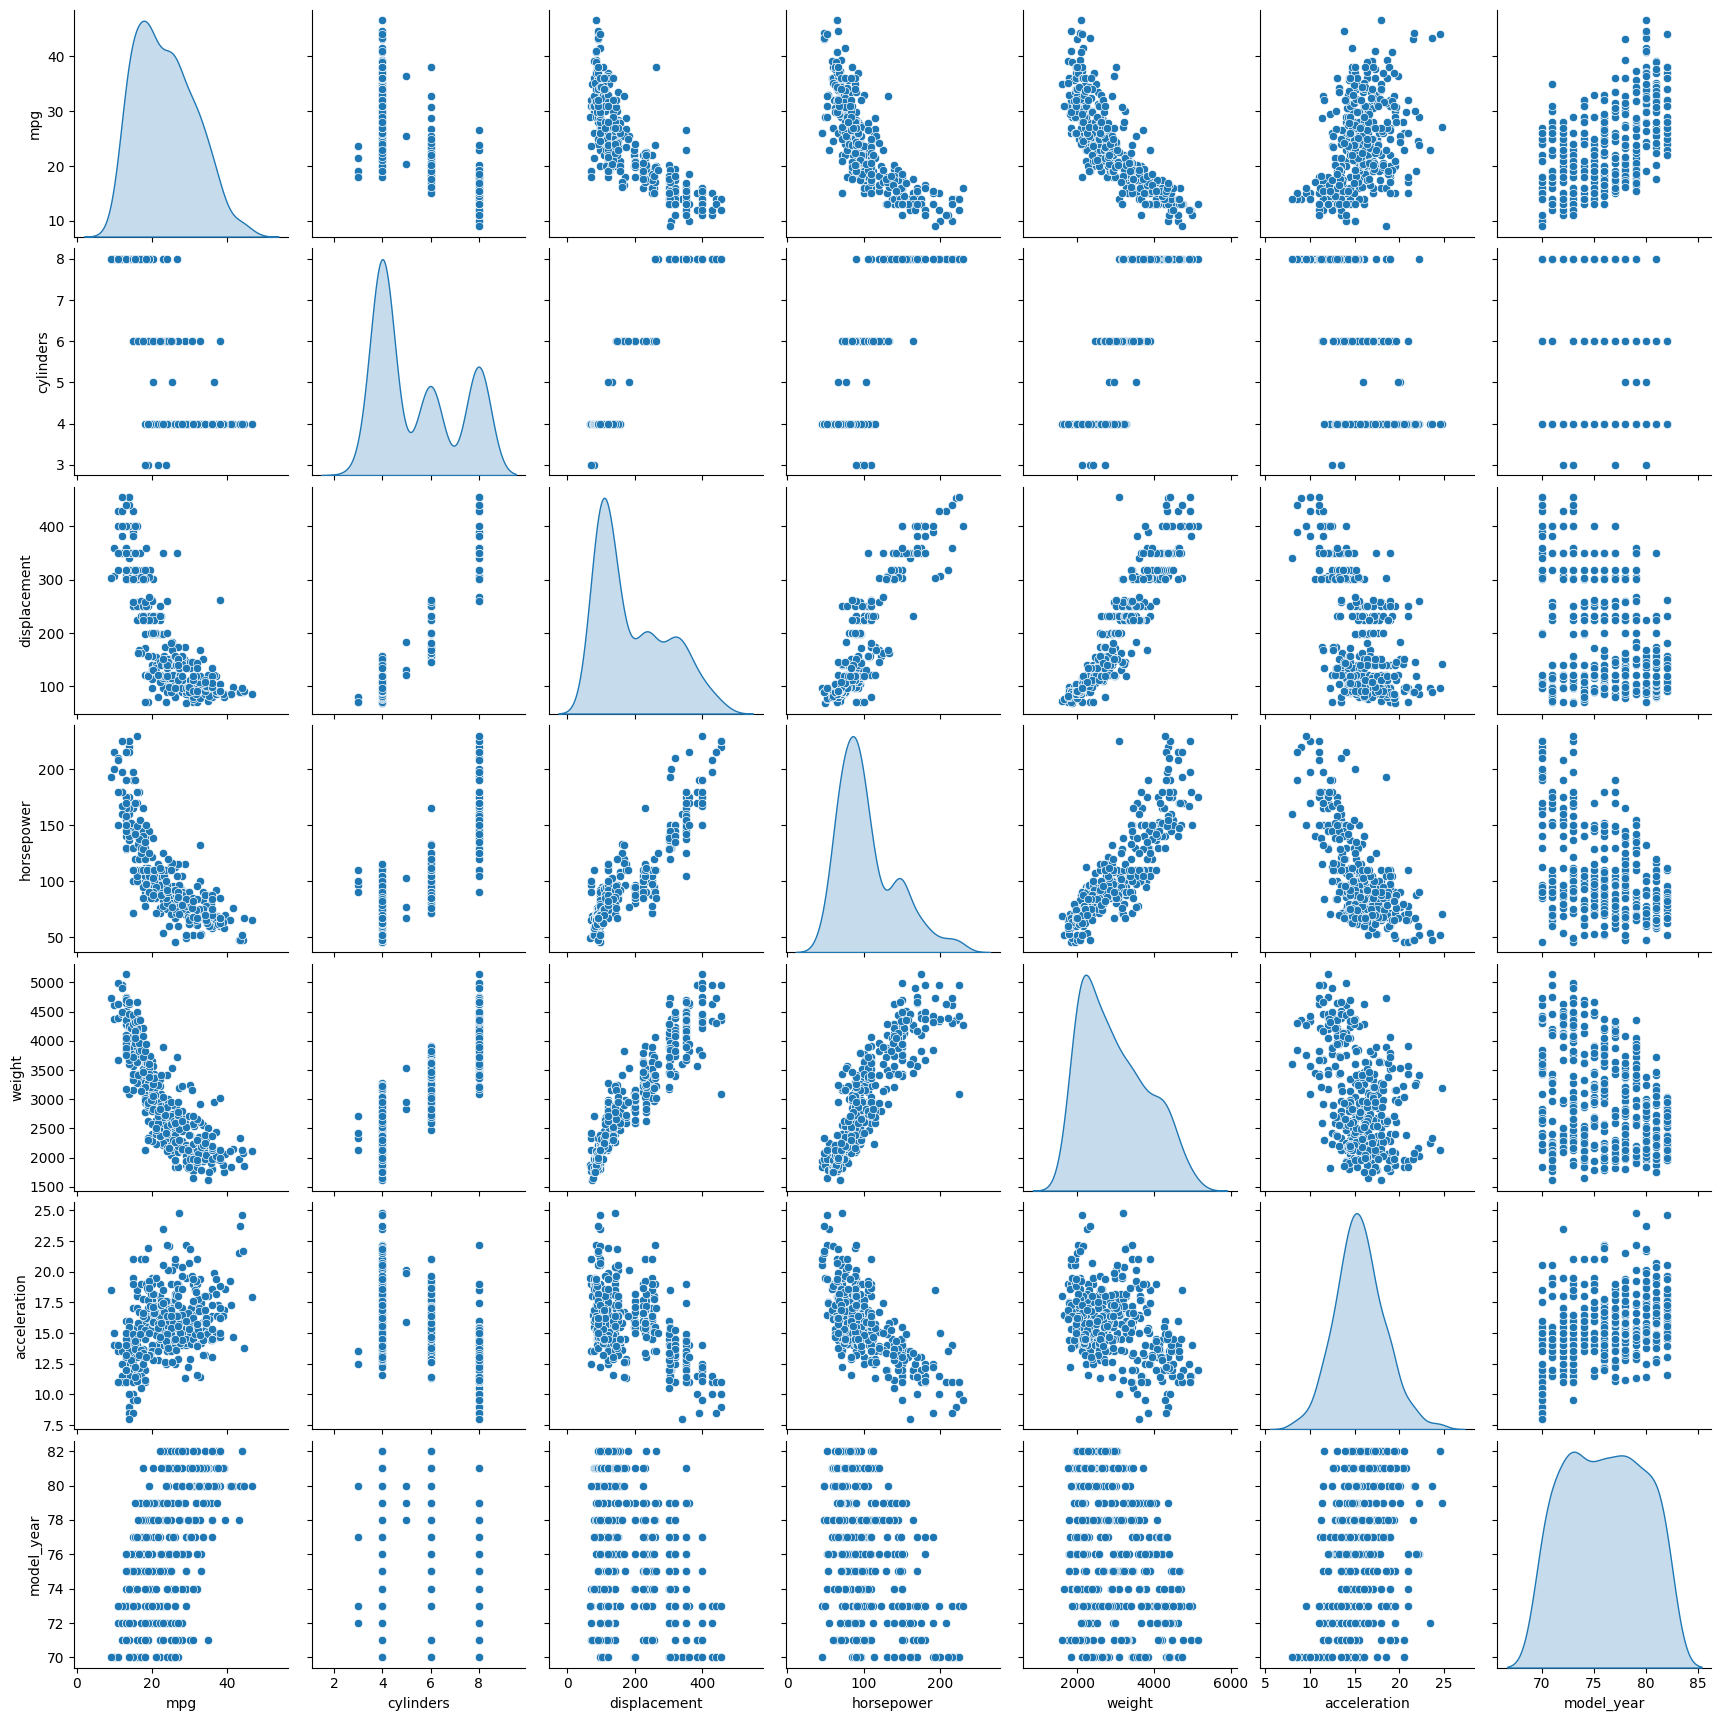

In [4]:
# Visualize the distribution of the target variable (mpg)
sns.histplot(df['mpg'], kde=True, bins=20)
plt.title("Distribution of MPG")
plt.xlabel("MPG")
plt.ylabel("Frequency")
plt.show()

# Pairplot to observe relationships between features
sns.pairplot(df, diag_kind='kde')
plt.show()

Data Preprocessing

In [5]:
# Convert 'horsepower' to numeric, handling errors
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Fill missing values in 'horsepower' with the mean
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

# Drop the 'name' column (not useful for prediction)
df = df.drop(columns=['name'])

# Encode 'origin' column using LabelEncoder
le = LabelEncoder()
df['origin'] = le.fit_transform(df['origin'])

# Check the processed data
print(df.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year  origin  
0          70       2  
1          70       2  
2          70       2  
3          70       2  
4          70       2  


<ipython-input-5-f8452bd2fb85>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)


Target and Feature Variables

In [6]:
# Define target variable and features
X = df.drop(columns=['mpg'])  # Features (all columns except mpg)
y = df['mpg']                 # Target variable (mpg)

Train Test Split

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Modeling

In [8]:
# Initialize and train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
# Initialize and train a random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Model Evaluation

In [10]:
# Predictions
y_pred_lr = lr.predict(X_test)  # Linear Regression
y_pred_rf = rf.predict(X_test)  # Random Forest

# Linear Regression Performance
print("Linear Regression Performance:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lr))
print("R^2 Score:", r2_score(y_test, y_pred_lr))

# Random Forest Performance
print("\nRandom Forest Performance:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))
print("R^2 Score:", r2_score(y_test, y_pred_rf))

Linear Regression Performance:
Mean Squared Error (MSE): 8.881738481148911
R^2 Score: 0.8348088907935461

Random Forest Performance:
Mean Squared Error (MSE): 4.8317573000000005
R^2 Score: 0.9101343335544673


Predictions

In [11]:
# Ensure the new input data includes all required features
new_data = pd.DataFrame({
    'cylinders': [6],
    'displacement': [200.0],
    'horsepower': [100.0],
    'weight': [3100],
    'acceleration': [15.0],
    'model_year': [76],
    'origin': ['usa']  # Provide the categorical value
})

# Apply the same encoding and preprocessing as the training data
new_data['origin'] = le.transform(new_data['origin'])  # Encode 'origin'

# Match the column order of the training data
new_data = new_data.reindex(columns=X.columns, fill_value=0)

# Predict MPG
predicted_mpg_lr = lr.predict(new_data)
predicted_mpg_rf = rf.predict(new_data)

print("Predicted MPG (Linear Regression):", predicted_mpg_lr[0])
print("Predicted MPG (Random Forest):", predicted_mpg_rf[0])


Predicted MPG (Linear Regression): 21.806900049554528
Predicted MPG (Random Forest): 21.741


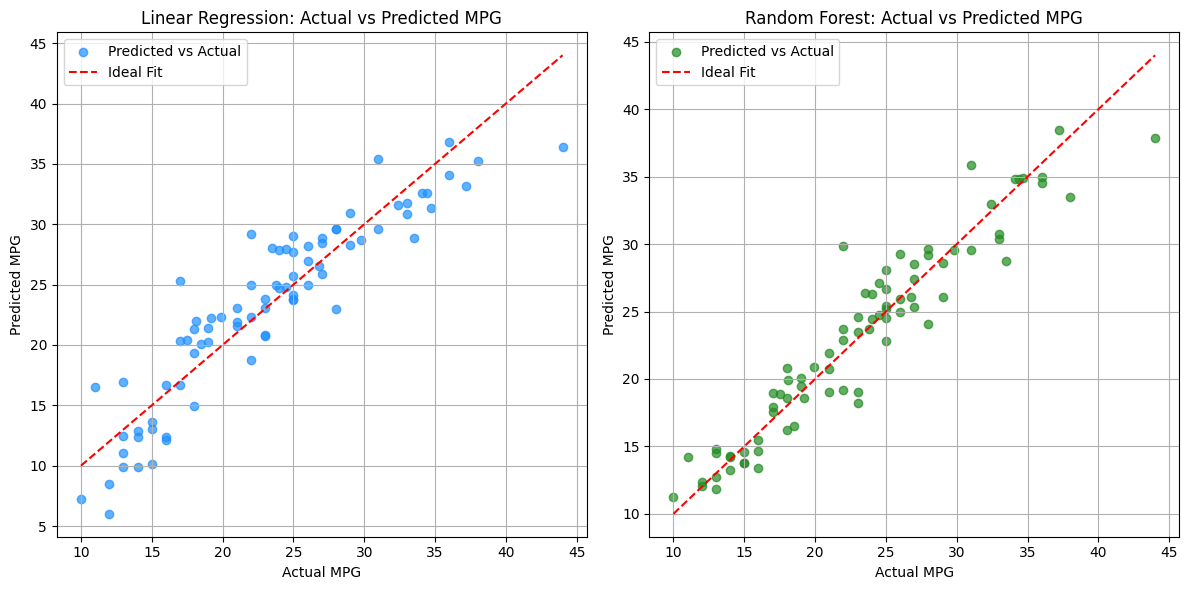

In [12]:
# Import necessary library
import matplotlib.pyplot as plt

# Generate predictions for the test set
y_pred_lr = lr.predict(X_test)  # Predictions from Linear Regression
y_pred_rf = rf.predict(X_test)  # Predictions from Random Forest

# Create a scatterplot for Linear Regression
plt.figure(figsize=(12, 6))

# Subplot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='dodgerblue', alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.title('Linear Regression: Actual vs Predicted MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.legend()
plt.grid()

# Subplot for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='forestgreen', alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.title('Random Forest: Actual vs Predicted MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.legend()
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()
